# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [5]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [6]:
print(iris.keys())

print(iris["filename"])

print(iris.data[0:10])

print(type(iris.data[0:10]))

print(iris.target_names) 

print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [59]:
# we only take the first two features.
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
#以下是組成 pandas DataFrame (也可以不用這種做)
print(str(iris['feature_names']))
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [61]:
print('target_names: ' +str(iris['target_names']))

target_names: ['setosa' 'versicolor' 'virginica']


In [55]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [62]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y], axis=1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
#以下是組成 pandas DataFrame (也可以不用這樣做)
x = pd.DataFrame(iris.data, columns = iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [63]:
#只取長度項的欄位
iris_data = iris_data[['sepal length (cm)','petal length (cm)',"target"]]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [65]:
#只選擇目標為0與1的資料，設定條件留標的
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data
#確認資料量
print(iris['data'].size)
#確認資料筆數
print(iris['data'].size/len(iris['feature_names']))

600
150.0


## 切分訓練集與測試集
> train_test_split()

In [83]:
from sklearn.model_selection import train_test_split
iris_data

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data[['target']],test_size = 0.2)

In [84]:
X_train.head()


,sepal length (cm),petal length (cm)
80,5.5,3.8
30,4.8,1.6
15,5.7,1.5
31,5.4,1.5
7,5.0,1.5


In [68]:
X_train.shape

(80, 2)

In [85]:
X_test.head()

,sepal length (cm),petal length (cm)
5,5.4,1.7
75,6.6,4.4
73,6.1,4.7
11,4.8,1.6
29,4.7,1.6


In [112]:
X_test.shape

pandas.core.frame.DataFrame

In [86]:
Y_train.head()

,target
80,1
30,0
15,0
31,0
7,0


In [79]:
Y_train.shape

(80, 1)

In [87]:
Y_test.head()

,target
5,0
75,1
73,1
11,0
29,0


In [88]:
Y_test.shape

(20, 1)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [2]:
from IPython.display import Math
Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [3]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [136]:
def norm_stats(dfs):
    minimum = np.min(dfs, axis =0)
    maximum = np.max(dfs, axis =0)
    mu = np.mean(dfs, axis =0)
    sigma = np.std(dfs, axis =0)
    return (minimum, maximum, mu, sigma)

In [152]:
test = np.array([[1,2],[4,5],[1,3]])
print(test)
print(np.mean(test, axis = 1))
print(np.mean(test, axis = 0))

[[1 2]
 [4 5]
 [1 3]]
[1.5 4.5 2. ]
[2.         3.33333333]


In [141]:
Xstd = np.std(X_train, axis =0)
print(Xstd)
Xm = np.mean(X_train, axis =0)
print(Xm)

80    0.85
30    1.60
15    2.10
31    1.95
7     1.75
      ... 
56    0.80
36    2.10
76    1.00
28    1.90
90    0.55
Length: 80, dtype: float64
sepal length (cm)    5.45625
petal length (cm)    2.87750
dtype: float64


In [137]:
def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [138]:
stats = norm_stats(X_train)
stats

(sepal length (cm)    4.3
 petal length (cm)    1.0
 dtype: float64,
 sepal length (cm)    7.0
 petal length (cm)    5.1
 dtype: float64,
 sepal length (cm)    5.45625
 petal length (cm)    2.87750
 dtype: float64,
 sepal length (cm)    0.621258
 petal length (cm)    1.448877
 dtype: float64)

In [155]:
stats = norm_stats(X_train)
arr_X_train = np.array(z_score(X_train, stats))
arr_X_train[:5] 

array([[ 0.07042168,  0.63670013],
       [-1.0563252 , -0.88171753],
       [ 0.39234936, -0.95073651],
       [-0.09054216, -0.95073651],
       [-0.73439752, -0.95073651]])

In [156]:
arr_Y_train = np.array(Y_train) #測試集，只做型態轉換
arr_Y_train[:5] 

array([[1],
       [0],
       [0],
       [0],
       [0]])

## use sklearn

In [167]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.45625 2.8775 ]
[0.62125755 1.44887672]


In [168]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 0.07042168,  0.63670013],
       [-1.0563252 , -0.88171753],
       [ 0.39234936, -0.95073651],
       [-0.09054216, -0.95073651],
       [-0.73439752, -0.95073651]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [169]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])
#如果fit和transform沒有在同一個式子中要小心，此案例fit Xtrain，但transfrom Xtest

[[-0.09054216 -0.81269854]
 [ 1.84102392  1.05081404]
 [ 1.03620472  1.25787099]
 [-1.0563252  -0.88171753]
 [-1.21728904 -0.88171753]
 [ 1.51909624  1.11983302]
 [-1.37825288 -1.0197555 ]
 [-0.89536136 -0.95073651]
 [-0.57343368 -1.0197555 ]
 [-0.09054216 -0.95073651]]


you can also use fit_transform method (i.e., fit and then transform)    

In [161]:
X_train_std = sc.fit_transform(X_train)  

[[-0.18569534 -0.77457729]
 [ 1.52841548  1.13533931]
 [ 0.81420264  1.34755227]
 [-1.04275075 -0.84531494]
 [-1.18559331 -0.84531494]
 [ 1.24273034  1.20607697]
 [-1.32843588 -0.98679025]
 [-0.89990818 -0.91605259]
 [-0.61422304 -0.98679025]
 [-0.18569534 -0.91605259]]


In [163]:
#針對test的土法煉鋼法(前置norm_stats()、Z_score()的function)
stats = norm_stats(X_test)
arr_X_test = np.array(z_score(X_test, stats))
arr_X_test[:10]

array([[-0.18569534, -0.77457729],
       [ 1.52841548,  1.13533931],
       [ 0.81420264,  1.34755227],
       [-1.04275075, -0.84531494],
       [-1.18559331, -0.84531494],
       [ 1.24273034,  1.20607697],
       [-1.32843588, -0.98679025],
       [-0.89990818, -0.91605259],
       [-0.61422304, -0.98679025],
       [-0.18569534, -0.91605259]])

In [171]:
#sc.fit_transform 套路一次喝成，不會有fit和transform不小心帶錯的失誤
X_test_std = sc.fit_transform(X_test)  
X_test_std[:10]

array([[-0.18569534, -0.77457729],
       [ 1.52841548,  1.13533931],
       [ 0.81420264,  1.34755227],
       [-1.04275075, -0.84531494],
       [-1.18559331, -0.84531494],
       [ 1.24273034,  1.20607697],
       [-1.32843588, -0.98679025],
       [-0.89990818, -0.91605259],
       [-0.61422304, -0.98679025],
       [-0.18569534, -0.91605259]])

In [172]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.49320642450369
29.2872715838663


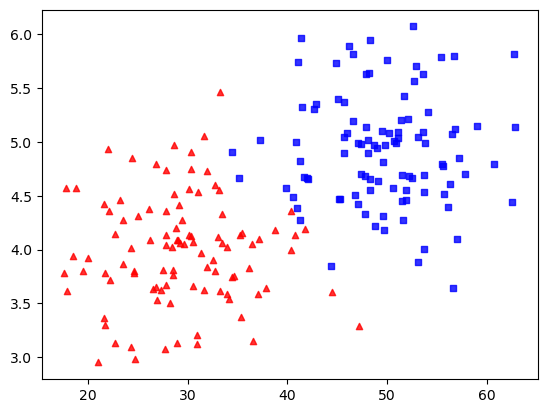

In [190]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [191]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [192]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [193]:
minmax_norm(x_val[:10])

array([0.        , 0.69535463, 0.17374039, 0.55200232, 0.83434913,
       0.72723485, 0.59810732, 1.        , 0.51138821, 0.20088046])

In [194]:
print(x_val.shape)

(200,)


In [196]:
from sklearn.preprocessing import MinMaxScaler
#1D --> 2D
x_val=x_val.reshape(-1, 1) 
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200, 1)
[62.8807497]
[[0.52669434]
 [0.85107275]
 [0.6077431 ]
 [0.78419983]
 [0.91591278]
 [0.86594466]
 [0.80570751]
 [0.99318783]
 [0.76525361]
 [0.62040377]]
